### DataSet Description:
We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set.

In [2]:
import pandas as pd
houses = pd.read_table("AmesHousing_1.txt")

In [38]:
houses.shape

(2930, 82)

In [3]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### 1. The Range

In [1]:
def get_range(values):
    return (max(values) - min(values))

print(get_range([1,2,3,5]))

4


In [6]:
#houses['Yr Sold'].unique() returns a list with the unique values of that column.
years = houses['Yr Sold'].unique()

In [8]:
range_by_year = {}

for year in houses["Yr Sold"].unique():
    range_by_year[year] = get_range(houses[houses["Yr Sold"] == year]["SalePrice"])

In [9]:
range_by_year

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}

### 2. The Average Distance

In [12]:
def average_distance(array):
    mean = sum(array)/len(array)
    
    distances = [(mean - value) for value in array]
    
    mean_distance = sum(distances)/len(distances)
    
    return mean_distance

0.0

In [ ]:
C = [1,1,1,1,1,1,1,1,1,21]

avg_distance = average_distance(C)
avg_distance

The mean is the balance point of a distribution, that's why mean of the distance distribution is zero.

### 3. Mean Absolute Deviation

In [13]:
def mean_abs_deviation(array):
    mean = sum(array)/len(array)
    
    distances = [abs(mean - value) for value in array]
    
    return sum(distances)/len(distances)

In [15]:
mad = mean_abs_deviation(C)
mad

3.6

### 4. Variance

In [16]:
def variance(array):
    mean = sum(array)/len(array)
    
    sq_distances = [(mean - value)**2 for value in array]
    
    return sum(sq_distances)/len(sq_distances)



In [18]:
variance_C = variance(C)
variance_C

36.0

 The result considerably higher than 20 and in the unit of square of the parameter of interest

### 5. Standard Deviation

In [21]:
from math import sqrt
def standard_deviation(array):
    mean = sum(array)/len(array)
    
    sq_distances = [(mean - value)**2 for value in array]
    
    variance = sum(sq_distances)/len(sq_distances)
    
    return sqrt(variance)

In [23]:
standard_deviation_C = standard_deviation(C)
standard_deviation_C

6.0

 The result considerably less than 20 but greater than 0, as we expected

### 6. Average Variability Around the Mean

In [31]:
print(standard_deviation(houses['SalePrice']))

79873.05865192247


In [29]:
print(houses['SalePrice'].mean())

180796.0600682594


The house price vary `+- 79873.058$` over the average price of `180796.06$`. Plot the distribution of `SalePrice`

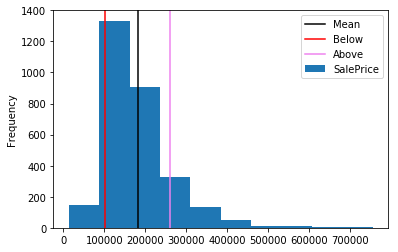

In [33]:
import matplotlib.pyplot as plt
mean = houses['SalePrice'].mean()
st_dev = standard_deviation(houses['SalePrice'])
houses['SalePrice'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Below')
plt.axvline(mean + st_dev, color = 'Violet', label = 'Above')
plt.legend()

In [35]:
#Find average house saling price for each year 
avg_price_by_year = {}
for year in houses["Yr Sold"].unique():
    avg_price_by_year[year] = standard_deviation(houses[houses["Yr Sold"] == year]["SalePrice"])
    
print(avg_price_by_year)

{2010: 74521.920711871, 2009: 80794.39070298373, 2008: 75531.94622558328, 2007: 82483.28433288915, 2006: 82553.57563561267}


In [ ]:
greatest_variability = max(avg_price_by_year, key=avg_price_by_year.get)

In [37]:
lowest_variability   = min(avg_price_by_year, key=avg_price_by_year.get)
lowest_variability

2010

### 7. Standard deviation is basicaly a Measure of Spread

In [39]:
#standard deviations of these four distributions 
for i in range(1,5):
    sample = houses['SalePrice'].sample(50, random_state = i)
    # we used the same random states for the samples in the graph above
    st_dev = standard_deviation(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))

Sample 1: 81785.0811515768
Sample 2: 100370.62998094413
Sample 3: 60676.038515710636
Sample 4: 64436.40016450328


In [40]:
sample1 = houses['Year Built'].sample(50, random_state = 1)
sample2 = houses['Year Built'].sample(50, random_state = 2)

In [42]:
st_dev1 = standard_deviation(sample1)
st_dev2 = standard_deviation(sample2)
st_dev1
st_dev2

29.239589600403075

32.466234767832255

bigger spread is for `sample 2`

### 8. The Sample Standard Deviation

(array([ 288., 1188., 1476., 1096.,  510.,  224.,  126.,   37.,   37.,
          17.]),
 array([ 16133.40943508,  35119.34967593,  54105.28991677,  73091.23015762,
         92077.17039847, 111063.11063931, 130049.05088016, 149034.99112101,
        168020.93136185, 187006.8716027 , 205992.81184354]),
 <a list of 10 Patch objects>)

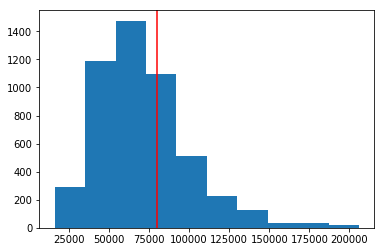

In [43]:
import matplotlib.pyplot as plt

#Let's consider the data we have for SalePrice a population and sample it 5000 times
st_devs = []
for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    # we used the same random states for the samples in the graph above
    st_devs.append(standard_deviation(sample))

    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses["SalePrice"]), c= 'red')
plt.show()

####  From the above plot it's visible that most sample standard deviations cluster below the population standard deviation i.e., sample underestimates ***on average*** the population standard deviation.
Some sample standard deviations are lower than the population standard deviation, some are greater, some may even be equal to the population standard deviation, but on average the sample standard deviation is lower than the population standard deviation.

In [48]:
#sample sd
sum(st_devs)/5000

71291.09842866562

In [50]:
#population sd
standard_deviation(houses["SalePrice"])

79873.05865192247

### 9. Bessel's Correction
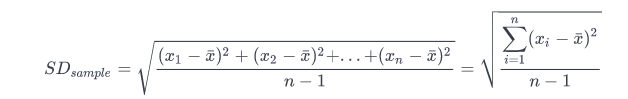
This small correction we added to the sample standard deviation (dividing by `n-1` instead of `n`) is called Bessel's correction.

In [51]:
def bessels_standard_deviation(array):
    mean = sum(array)/len(array)
    
    sq_distances = [(mean - value)**2 for value in array]
    
    variance = sum(sq_distances)/(len(sq_distances) - 1)
    
    return sqrt(variance)

(array([ 288., 1188., 1477., 1096.,  510.,  224.,  126.,   37.,   37.,
          17.]),
 array([ 17006.1067463 ,  37019.04497328,  57031.98320025,  77044.92142722,
         97057.8596542 , 117070.79788117, 137083.73610814, 157096.67433512,
        177109.61256209, 197122.55078906, 217135.48901604]),
 <a list of 10 Patch objects>)

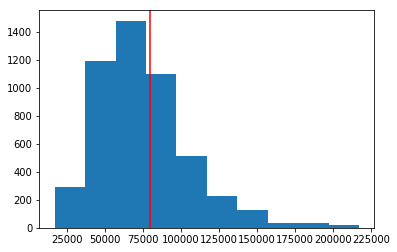

In [57]:
bst_devs = []
for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    # we used the same random states for the samples in the graph above
    bst_devs.append(bessels_standard_deviation(sample))

    
plt.hist(bst_devs)
plt.axvline(standard_deviation(houses["SalePrice"]), c= 'red') #Note population SD is not corrected
plt.show()

In [56]:
#sample bessel's sd
sum(bst_devs)/5000

75160.6439928273

Bessel's SD corrections partially improved the sample underestimation of population SD.

### 10. Standard Notation(Standard Deviation and Variance in Pandas and Numpy)

In [58]:
sample = houses.sample(100, random_state = 1)

In [60]:
from numpy import std, var
pandas_stdev = sample["SalePrice"].std(ddof=1)
numpy_stdev = std(sample["SalePrice"], ddof=1)

equal_stdevs = pandas_stdev == numpy_stdev
equal_stdevs

True

In [61]:
pandas_var = sample["SalePrice"].var(ddof=1)
numpy_var = var(sample["SalePrice"], ddof=1)
equal_vars = pandas_var == numpy_var
equal_vars

True

### 11. Sample Variance — Unbiased Estimator

We call a statistic an unbiased estimator when that statistic is equal on average to the parameter it estimates. Remember that the sample mean $\bar x$ is an unbiased estimator for the population mean 
μ no matter whether we sample with or without replacement. The sample variance 
$s^2$ is an unbiased estimator for the population variance $σ^2$ only when we sample with replacement, however standard deviation is NOT unbiased estimator. Although the sample variance $s^2$
is an unbiased estimator, and the sample standard deviation s is basically $\sqrt {s^2}$, the unbiasedness doesn't carry over. **we'll see that the sample variance $s^2$ and the sample standard deviation $s$ are biased when we sample without replacement.**

In [3]:
import numpy as np
from numpy import std, var

population = [0, 3, 6]

samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]

In [4]:
#population
pop_std = std(population)
pop_var = var(population)
pop_var
pop_std



6.0

2.449489742783178

In [5]:
#sample
mean_std_sample = np.mean([std(sample) for sample in samples])
mean_var_sample = np.mean([var(sample) for sample in samples])
mean_var_sample
mean_std_sample

4.5

2.0

In [6]:
#comparison
equal_var = mean_var_sample == pop_var
equal_stdev = mean_std_sample == pop_std
equal_var
equal_stdev

False

False